In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [78]:
# Count missing values

missing_counts = df.isnull().sum()
missing_counts

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [79]:
# The percentage of missing values

total_rows = df.shape[0]
missing_percentages = (missing_counts / total_rows) * 100
missing_percentages

country                   0.048472
description               0.000000
designation              28.825661
points                    0.000000
price                     6.921544
province                  0.048472
region_1                 16.347493
region_2                 61.136715
taster_name              20.192197
taster_twitter_handle    24.015357
title                     0.000000
variety                   0.000769
winery                    0.000000
dtype: float64

In [80]:
# Drop columns with high percentage of missing values and not useful for analysis

# df = df.drop(['region_2', 'designation', 'taster_twitter_handle', 'taster_name'], axis=1)

In [81]:
# Count missing values

missing_counts = df.isnull().sum()
missing_counts

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [83]:
# # Preprocess the data by handling missing values

# for c in df.columns:
#     if df[c].isnull().any():
#         print(c)
#         if(df[c].dtype == 'O'):
#             df[c] = df[c].fillna(df[c].mode().values[0])
#         else:
#             df[c] = df[c].fillna(df[c].mean())





# Create binary indicator columns for missing values
df['designation_missing'] = df['designation'].isnull().astype(int)

# Impute missing values in 'region_1' and 'region_2' with the most frequent value
df['region_1'] = df['region_1'].fillna(df['region_1'].mode()[0])
df['region_2'] = df['region_2'].fillna(df['region_2'].mode()[0])

# Impute missing values in 'taster_name' and 'taster_twitter_handle' with the most frequent value
df['taster_name'] = df['taster_name'].fillna(df['taster_name'].mode()[0])
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna(df['taster_twitter_handle'].mode()[0])

# Impute missing 'price' values with median price
df['price'] = df.groupby(['variety', 'province'])['price'].transform(lambda x: x.fillna(x.median()))

# Drop the original 'designation' column
df.drop(columns=['designation'], inplace=True)

# Print the first few rows of the DataFrame to verify changes
print(df.head())



/home/mohamedismail/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/mohamedismail/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/mohamedismail/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/mohamedismail/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/mohamedismail/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/mohamedismail/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: Runtime

    country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87   20.0   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   

            province             region_1           region_2  \
0  Sicily & Sardinia                 Etna      Central Coast   
1              Douro          Napa Valley      Central Coast   
2             Oregon    Willamette Valley  Willamette Valley   
3           Michigan  Lake Michigan Shore      Central Coast   
4             Oregon    Willamette Valley  Willamette Valley   

          taster_name taster_twitter_handle  \
0       Kerin O’Keefe          @kerinokeefe   
1          Roger Voss            @

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   points                 129971 non-null  int64  
 3   price                  129783 non-null  float64
 4   province               129908 non-null  object 
 5   region_1               129971 non-null  object 
 6   region_2               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
 12  designation_missing    129971 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 13.9+ MB


In [85]:
# convert categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype == 'O':
        le = LabelEncoder()
        df[c] = le.fit_transform(df[c])
        print(le.classes_)

['Argentina' 'Armenia' 'Australia' 'Austria' 'Bosnia and Herzegovina'
 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'China' 'Croatia' 'Cyprus'
 'Czech Republic' 'Egypt' 'England' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'India' 'Israel' 'Italy' 'Lebanon' 'Luxembourg' 'Macedonia'
 'Mexico' 'Moldova' 'Morocco' 'New Zealand' 'Peru' 'Portugal' 'Romania'
 'Serbia' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Switzerland'
 'Turkey' 'US' 'Ukraine' 'Uruguay' nan]
['"Chremisa," the ancient name of Krems, is commemorated in this wine that comes from Krems vineyards. It has tight, tangy apple-driven acidity, with a bright, light, citrusy character. Not for aging.'
 "$10 for this very drinkable Cab? That's crazy. But Line 39 is exactly that, a concentrated, juicy and fruity Cab with plenty of classic Cab tannins that's an incredibly good value and probably pretty easy to find. Scoop it up when you find it, though note that two bottles were tasted here with some bottle variation."
 "$14 is a prett

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  int64  
 1   description            129971 non-null  int64  
 2   points                 129971 non-null  int64  
 3   price                  129783 non-null  float64
 4   province               129971 non-null  int64  
 5   region_1               129971 non-null  int64  
 6   region_2               129971 non-null  int64  
 7   taster_name            129971 non-null  int64  
 8   taster_twitter_handle  129971 non-null  int64  
 9   title                  129971 non-null  int64  
 10  variety                129971 non-null  int64  
 11  winery                 129971 non-null  int64  
 12  designation_missing    129971 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 13.9 MB


In [87]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
# Train the model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


ValueError: Input y contains NaN.

37.319384049651866


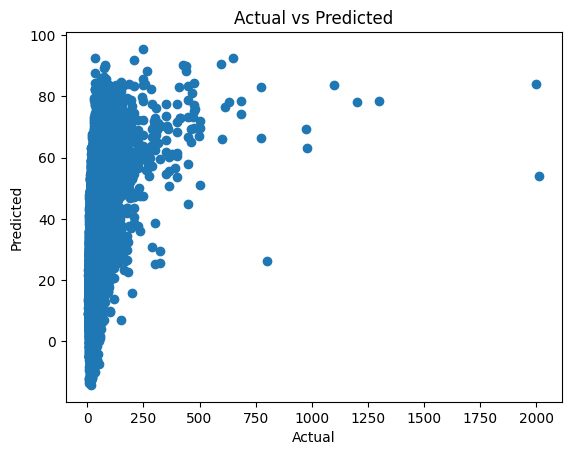

In [ ]:
# Evaluate the model

from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

# Plot the predicted values against the actual values

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


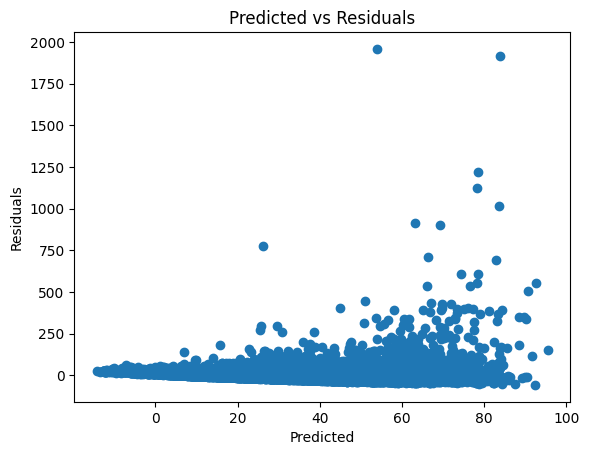

In [ ]:
# Plot the residuals

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.show()

In [ ]:
Accuracy = lr.score(X_test, y_test)
print(Accuracy * 100)

15.940392776691603
